In [59]:
!pyppeteer-install

chromium is already installed.


## Importing Basic Libraries for Visualisation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the file

In [2]:
df=pd.read_csv("ipl data.csv")

#### Reading the records from the file

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Information on the file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

#### Null Values in the dataset

In [5]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

### Dropping the column with major Null Values

In [6]:
df.drop(columns="umpire3",inplace=True)

In [7]:
df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

### Deleting the rows with Null values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

#### So, We're good to go with all the Non-Null values left in the dataset!!!

*Let's get started with the visualisation of data*

## Data Analysis & Visualisation

### **Q1. which city hosted most number of matches?**

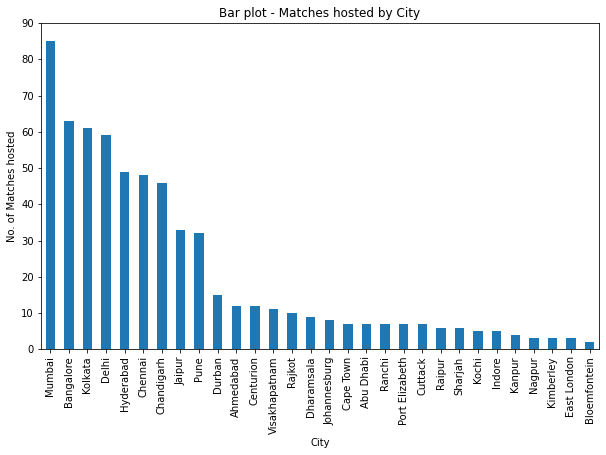

In [10]:
plt.figure(figsize=(10,6))
df["city"].value_counts().plot(kind="bar")
plt.title("Bar plot - Matches hosted by City")
plt.xlabel("City")
plt.ylabel("No. of Matches hosted")
plt.ylim(0,90)
plt.xticks(rotation=90)
plt.show()

### **Q2. All venue of mumbai city?**

In [61]:
df["venue"].loc[df["city"]=="Mumbai"].unique()

array(['Wankhede Stadium', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium'], dtype=object)

### **Q3. Venue of mumbai most number of matches played at**

- (draw bar plot and write down your insights)

In [12]:
df["venue"].loc[df["city"]=="Mumbai"].value_counts()

Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64

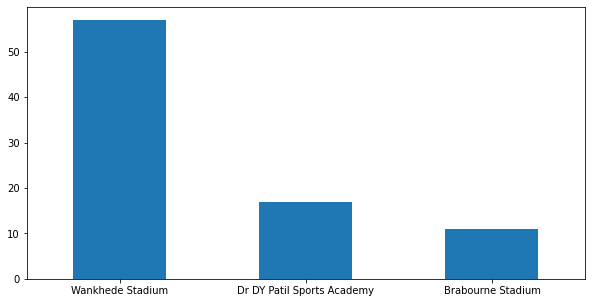

In [13]:
plt.figure(figsize=(10,5))
df["venue"].loc[df["city"]=="Mumbai"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

### Insights for CITY and VENUE with most matches:

- So according to the bar plot above we can tell that, **Mumbai City** has hosted the most matches with the fact that it has altogether 3 venues,*"Wankhede Stadium"* being the most frequent match holding venue with *57* matches, then *"Dr DY Patil Sports Academy"* & at last *"Brabourne Stadium".*

### 4. Preferred choice after winning a toss in mumbai

In [14]:
df["toss_decision"].loc[df["city"]=="Mumbai"].value_counts()

field    51
bat      34
Name: toss_decision, dtype: int64

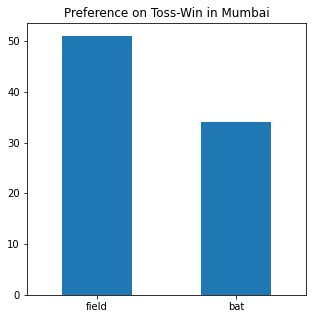

In [15]:
plt.figure(figsize=(5,5))
plt.title("Preference on Toss-Win in Mumbai")
df["toss_decision"].loc[df["city"]=="Mumbai"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

### Insights for CITY and Toss:

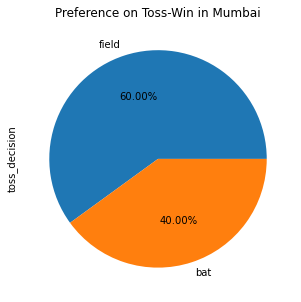

In [16]:
plt.figure(figsize=(5,5))
plt.title("Preference on Toss-Win in Mumbai")
df["toss_decision"].loc[df["city"]=="Mumbai"].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

- For **60%** of the times matches played at venues in mumbai, teams chose to **FIELD** first.

### 5. Team that won most number of toss

In [17]:
df["toss_winner"].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

#### Let's visualise above data With a Bar Plot

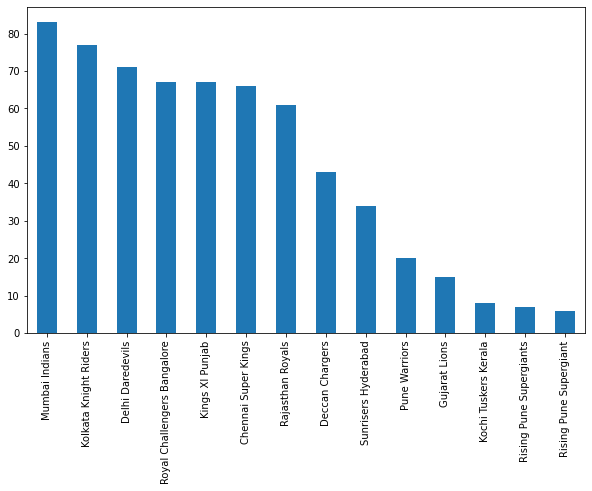

In [18]:
plt.figure(figsize=(10,6))
df["toss_winner"].value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

### Insights for Team and Toss:

- As we can see Team **"Mumbai Indians"** is the most frequent toss winning team.

In [19]:
df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


### Count of decision of teams after winning Toss

In [20]:
teams=df["toss_winner"].unique()
toss_data=pd.DataFrame([],columns=["Team","Decision","Count"])
for t in teams:
    bat_mask=df[(df["toss_winner"]==t)&(df["toss_decision"]=="bat")]
    field_mask=df[(df["toss_winner"]==t)&(df["toss_decision"]=="field")]
    toss_data=toss_data.append({"Team":t,"Decision":"Bat","Count":bat_mask["toss_winner"].count()},ignore_index=True)
    toss_data=toss_data.append({"Team":t,"Decision":"Field","Count":field_mask["toss_winner"].count()},ignore_index=True)

In [21]:
toss_data

,Team,Decision,Count
0,Royal Challengers Bangalore,Bat,19
1,Royal Challengers Bangalore,Field,48
2,Rising Pune Supergiant,Bat,0
3,Rising Pune Supergiant,Field,6
4,Kolkata Knight Riders,Bat,29
5,Kolkata Knight Riders,Field,48
6,Kings XI Punjab,Bat,25
7,Kings XI Punjab,Field,42
8,Sunrisers Hyderabad,Bat,17
9,Sunrisers Hyderabad,Field,17


### 6. Mumbai Indians preferance after winning a toss.

In [22]:
df["toss_decision"].loc[df["toss_winner"]=="Mumbai Indians"].value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

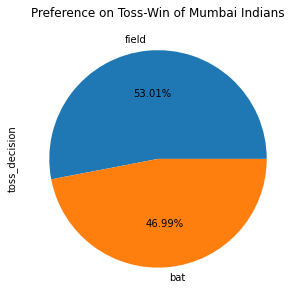

In [23]:
plt.figure(figsize=(5,5))
plt.title("Preference on Toss-Win of Mumbai Indians")
df["toss_decision"].loc[df["toss_winner"]=="Mumbai Indians"].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

#### Insights :
- "Mumbai Indians" tend to "Field first" when they win the toss. 

### 7. Head-to-head winning count of Mumbai Indians vs Chennai Super Kings

In [24]:
len(df[df["winner"]=="Mumbai Indians"].loc[(df["team1"]=="Mumbai Indians") & (df["team2"]=="Chennai Super Kings")]) + len(df[df["winner"]=="Mumbai Indians"].loc[(df["team2"]=="Mumbai Indians") & (df["team1"]=="Chennai Super Kings")])

12

In [25]:
mivscsk=df["winner"].loc[((df["team1"]=="Chennai Super Kings")&(df["team2"]=="Mumbai Indians")) | ((df["team2"]=="Chennai Super Kings")&(df["team1"]=="Mumbai Indians"))].value_counts()
mivscsk

Mumbai Indians         12
Chennai Super Kings     9
Name: winner, dtype: int64

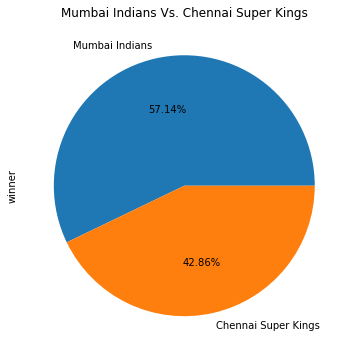

In [26]:
plt.figure(figsize=(6,6))
mivscsk.plot.pie(autopct="%1.2f%%")
plt.title("Mumbai Indians Vs. Chennai Super Kings")
plt.show()

#### Insight :

- This data tells us that between the rivalry matches of **"Mumbai Indians" vs. "Chennai Super Kings"** team **"Mumbai Indians"** have won more times.

### 8. Which team won most of the matches in mumbai?

In [27]:
mum=df["winner"].loc[df["city"]=="Mumbai"].value_counts()

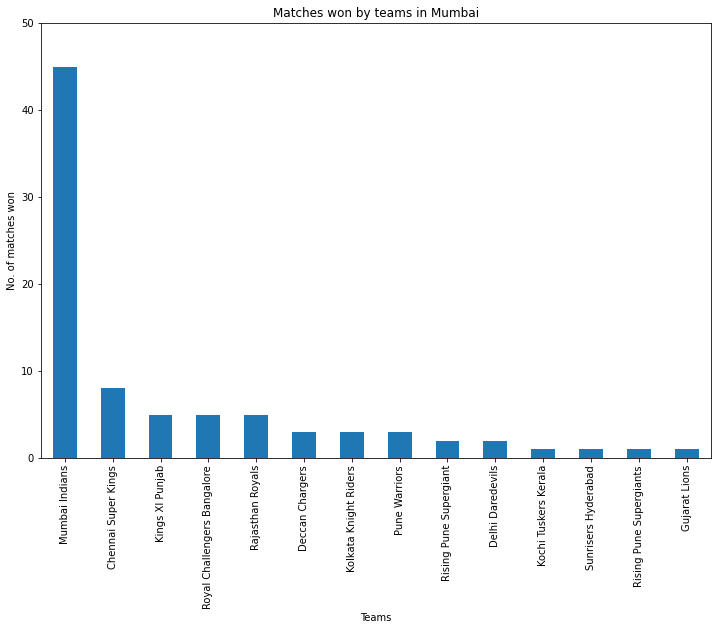

In [28]:
plt.figure(figsize=(12,8))
mum.plot(kind="bar")
plt.title("Matches won by teams in Mumbai")
plt.xlabel("Teams")
plt.ylabel("No. of matches won")
plt.ylim(0,50)
plt.show()

#### Insights

**Mumbai Indians** team has won the most matches in Mumbai City, as it is their home ground and they're familiar with the playing conditions. 

### 9. Team won the toss and won the match

In [29]:
toss=df["winner"].loc[df["winner"]==df["toss_winner"]].value_counts()

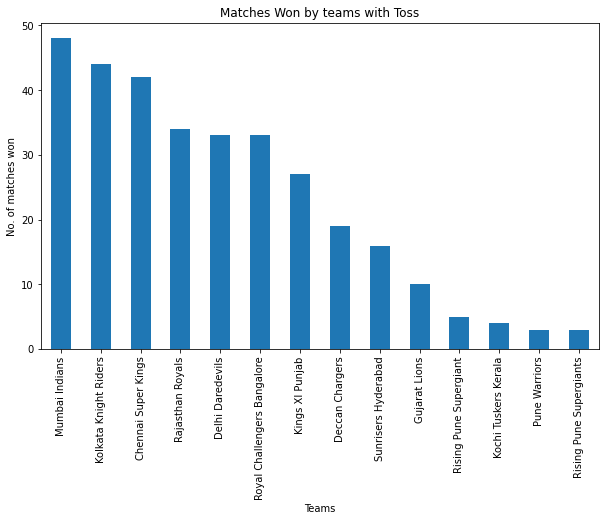

In [30]:
plt.figure(figsize=(10,6))
toss.plot(kind="bar")
plt.title("Matches Won by teams with Toss")
plt.xlabel("Teams")
plt.ylabel("No. of matches won")
plt.show()

#### Insight :

- This barplot helps us to extract the insight from this data that team **"Mumbai Indians"** have won the most matches when they won the toss.

### 10. Teams won the toss and won the match in mumbai. 

In [31]:
tossmum=df["winner"].loc[(df["winner"]==df["toss_winner"]) & (df["city"]=="Mumbai")].value_counts()

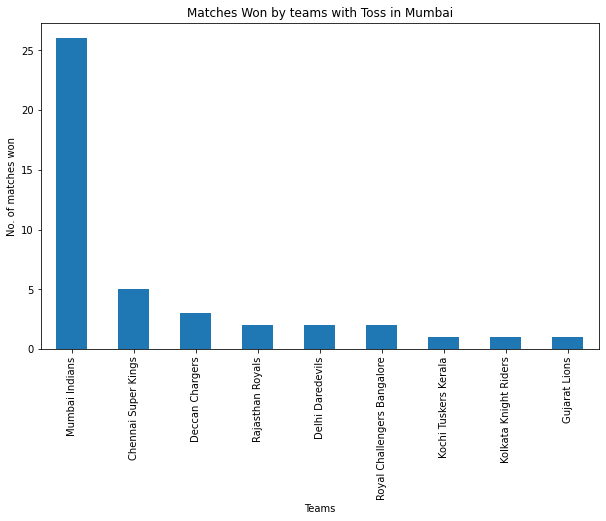

In [32]:
plt.figure(figsize=(10,6))
tossmum.plot(kind="bar")
plt.title("Matches Won by teams with Toss in Mumbai")
plt.xlabel("Teams")
plt.ylabel("No. of matches won")
plt.show()

#### Insight :

- This barplot helps us to extract the insight from this data that **"Mumbai Indians"** have won the most matches in **Mumbai City** when they won the toss.

### 11. Venue hosted most number of matches

In [33]:
ven=df["venue"].value_counts()

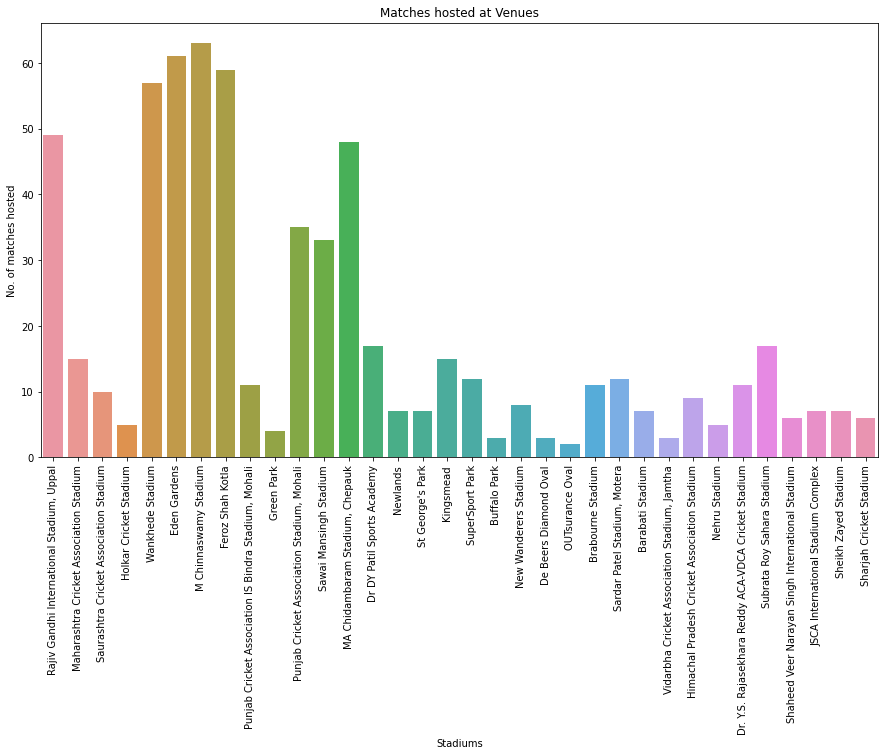

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="venue")
plt.title("Matches hosted at Venues")
plt.xlabel("Stadiums")
plt.ylabel("No. of matches hosted")
plt.xticks(rotation=90)
plt.show()

#### Insight :

- This Countplot helps us to extract the insight from this data that **"M Chinnaswamy Stadium"** Hosted most of the matches over the past 10 years. 

### 12. Matches chennai super kings played at M Chinnaswamy stadium

In [35]:
df["venue"].loc[((df["team1"]=="Chennai Super Kings")|(df["team2"]=="Chennai Super Kings"))&(df["venue"]=="M Chinnaswamy Stadium")].count()

7

### 13. Team that won most matches at M Chinnaswamy stadium?

In [36]:
MCSwin=df["winner"].loc[(df["venue"]=="M Chinnaswamy Stadium")].value_counts()
MCSwin

Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

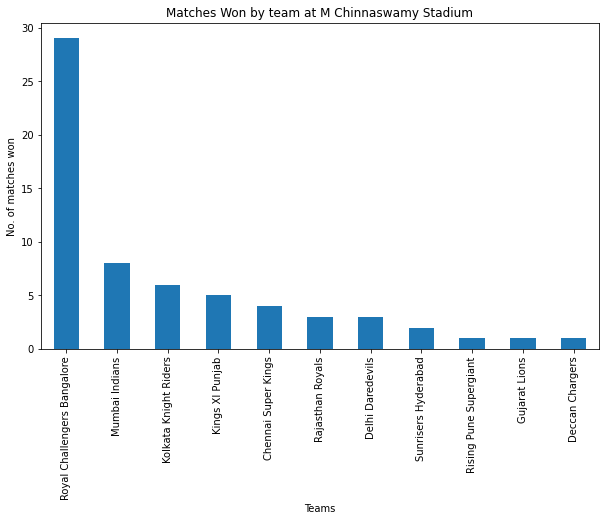

In [37]:
plt.figure(figsize=(10,6))
MCSwin.plot(kind="bar")
plt.title("Matches Won by team at M Chinnaswamy Stadium")
plt.xlabel("Teams")
plt.ylabel("No. of matches won")
plt.show()

#### Insight :

- This barplot helps us understand that **"Royal Challangers Banglore"** have won most matches at **"M Chinnaswamy Stadium"**, it is being their home ground in banglore. 

# Milestone Wise Analysis

### Top "Player of the match" Award winner players

In [38]:
df["player_of_match"].value_counts().idxmax()

'CH Gayle'

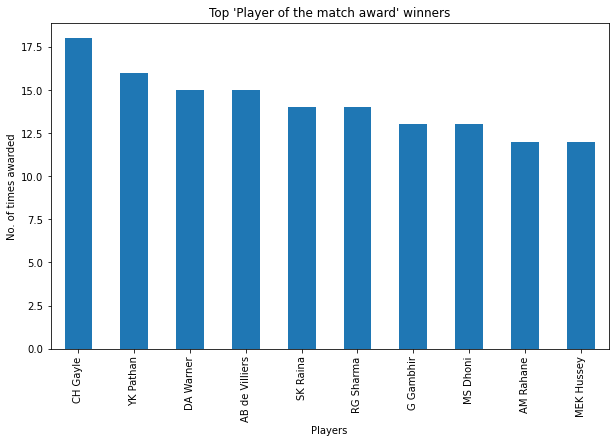

In [39]:
plt.figure(figsize=(10,6))
df["player_of_match"].value_counts().head(10).sort_values(ascending=False).plot(kind="bar")
plt.title("Top 'Player of the match award' winners")
plt.xlabel("Players")
plt.ylabel("No. of times awarded")
plt.show()

### Top "Player of the match" Award winner players for Mumbai Indians

In [40]:
POTM=df["player_of_match"].loc[(df["team1"]=="Mumbai Indians") | (df["team2"]=="Mumbai Indians")].value_counts().head()
POTM

RG Sharma          12
KA Pollard          9
SR Tendulkar        8
AT Rayudu           7
Harbhajan Singh     6
Name: player_of_match, dtype: int64

## Year Wise Analysis

#### 14. Matches Played in each year

In [41]:
df.groupby("season")["id"].count()

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    53
2015    57
2016    60
2017    58
Name: id, dtype: int64

### Details of IPL Season 2013

In [42]:
year=df.groupby(["season"])

In [43]:
year.get_group(2013).head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
386,387,2013,Pune,2013-04-07,Pune Warriors,Kings XI Punjab,Pune Warriors,bat,normal,0,Kings XI Punjab,0,8,M Vohra,Subrata Roy Sahara Stadium,S Asnani,SJA Taufel
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
388,389,2013,Jaipur,2013-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,19,0,SK Trivedi,Sawai Mansingh Stadium,Aleem Dar,S Das
389,390,2013,Mumbai,2013-04-09,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Mumbai Indians,44,0,KD Karthik,Wankhede Stadium,M Erasmus,VA Kulkarni
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin


#### 15. Total Matches played in IPL Season 2013

In [54]:
year.get_group(2013).shape[0]

76

#### Most frequent toss winner of IPL 2013

In [45]:
year.get_group(2013)["toss_winner"].value_counts().head(1)

Kolkata Knight Riders    12
Name: toss_winner, dtype: int64

#### Most frequent winner of IPL 2013

In [55]:
year.get_group(2013)["winner"].value_counts().idxmax()

'Mumbai Indians'

#### 16. Top 4 Teams Qualified for the IPL Season 2013 Playoffs

In [46]:
year.get_group(2013)["winner"].value_counts().head(4)

Mumbai Indians         13
Chennai Super Kings    12
Rajasthan Royals       11
Sunrisers Hyderabad    10
Name: winner, dtype: int64

#### 17. Teams ended up at the bottom of points table for the IPL Season 2013

In [47]:
year.get_group(2013)["winner"].value_counts().sort_values().head(4)

Delhi Daredevils         3
Pune Warriors            4
Kolkata Knight Riders    6
Kings XI Punjab          8
Name: winner, dtype: int64

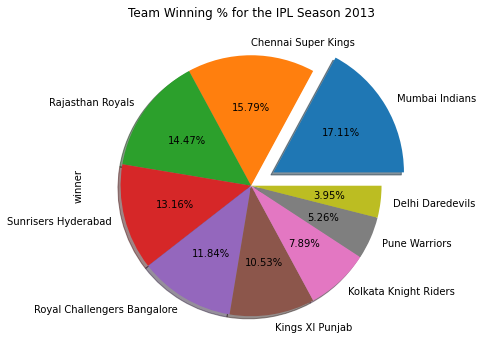

In [63]:
py=year.get_group(2013)["winner"].value_counts()
plt.figure(figsize=(6,6))
year.get_group(2013)["winner"].value_counts().plot.pie(autopct="%1.2f%%",explode=[0.2,0,0,0,0,0,0,0,0],shadow=True)
plt.title("Team Winning % for the IPL Season 2013")
plt.show()

#### 18. The Match won by big margin in IPL Season 2013

In [49]:
year.get_group(2013)["win_by_runs"].sort_values(ascending=False).head(1)

410    130
Name: win_by_runs, dtype: int64

#### 19. The Match by the teams without fall of a wicket in IPL Season 2013

In [50]:
year.get_group(2013)[df["win_by_wickets"]==10]["winner"]

390    Chennai Super Kings
Name: winner, dtype: object

#### 20. The city hosted most number of matches in 2013 


In [51]:
year.get_group(2013)["city"].value_counts()

Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64

#### 21. Most Matches won by team.

In [52]:
df["winner"].value_counts()

Mumbai Indians                 92
Kolkata Knight Riders          77
Chennai Super Kings            77
Royal Challengers Bangalore    71
Kings XI Punjab                69
Rajasthan Royals               63
Delhi Daredevils               61
Sunrisers Hyderabad            40
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

# Results :

- This **EDA** is mostly **Mumbai City** and it's team **Mumbai Indians** Centric as it has been most successful and one of the famous teams amoung IPL Teams

- 1. In all seasons of IPL, **Mumbai City** has hosted the *most matches* with the fact that it has altogether 3 venues,*Wankhede Stadium* being the most frequent match holding venue with 57 matches, then *Dr DY Patil Sports Academy* & at last *Brabourne Stadium*.
- 2. But if we consider a particular venue, "**M Chinnaswamy stadium**" of city "Banglore" has conducted most matches. 
- 3. For **60%** of the times matches played at venues in **Mumbai**, teams elected to **FIELD** *first*.
- 4. Also **Toss probability** & the *decision* to **field** on toss win has also gone *in favour* of the team plenty of times.
- 5. If we consider this above conditions, again **Mumbai Indians** have won more than *half of all the matches* that took place in **mumbai**, which means they have firm *grip on their home ground & it's playing conditions*.
- 6. If we look at the games of **Mumbai Indians**, in rivalry matches of "*Mumbai Indians" vs. "Chennai Super Kings*" team "**Mumbai Indians**" have won more times.
- 7. **Chris Gayle** or the "*The Universe Boss*", has won the "**Player of the match**" most times, and Hitman "**Rohit Sharma**" has won it most times for **Mumbai Indians**.
- 8. In **2013**, there were most matches of IPL were played, where **Mumbai Indians won** the season, **Chennai Super Kings** won a match without a loss of wicket, which was the **runner up** team for the season. 
- 9. Untill now **Mumbai Indians** have won the most matches.

## Conclusion :

- So if you are a fan of **Mumbai Indians Team**, there is more probability of you **celebrating the victory** of your favourite team, if the match is played at **"Wankhede Stadium"**, toss won by **Mumbai Indians** & they elect to **"Field" First**.


- Also in Season 2013 with this terms, Team **"Mumbai Indians"** won the season.


- So we can say that team **"Mumbai Indians"** has been the most **Successful team** in the IPL Cricket history.


- If they follow this agenda, then they can end up in top 4 teams for IPL Playoffs every year.